In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [145]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
#df

In [146]:
#dfdrop['AAV Adjusted'] = pd.to_numeric(dfdrop['AAV Adjusted'].str.replace('[\$,]', '', regex=True), errors='coerce')
dfdrop = df[df['AAV Adjusted'] != '#VALUE!']


dfdrop['AAV Adjusted'] = dfdrop['AAV Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate the mean by grouping by 'Year'
result = dfdrop.groupby('Year')['AAV Adjusted'].mean()
result


/var/folders/zg/329ty9ws0hlfcxk3nkfm6s9r0000gn/T/ipykernel_41293/3485387238.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfdrop['AAV Adjusted'] = dfdrop['AAV Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)
/var/folders/zg/329ty9ws0hlfcxk3nkfm6s9r0000gn/T/ipykernel_41293/3485387238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdrop['AAV Adjusted'] = dfdrop['AAV Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)


Year
2006.0    5.101792e+06
2007.0    5.693253e+06
2008.0    6.061547e+06
2009.0    5.333065e+06
2010.0    4.180221e+06
2011.0    4.319299e+06
2012.0    6.471811e+06
2013.0    5.129489e+06
2014.0    3.659193e+06
2015.0    3.516669e+06
2016.0    3.033273e+06
2017.0    4.223205e+06
2018.0    3.682922e+06
2019.0    4.329725e+06
2020.0    5.004288e+06
2021.0    4.631649e+06
2022.0    5.137960e+06
Name: AAV Adjusted, dtype: float64

Text(0.5, 1.0, 'Mean AAV Adjusted by Year')

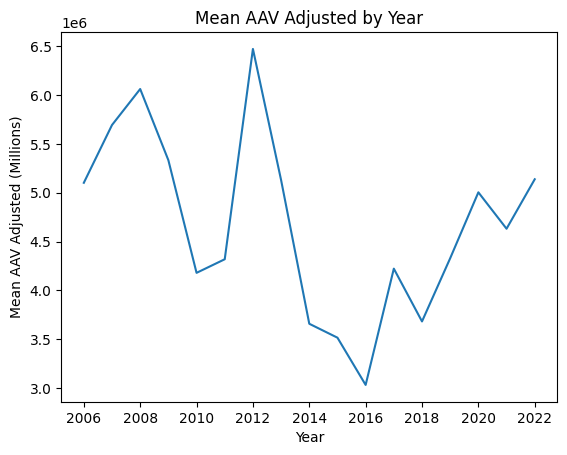

In [147]:
plt.plot(result.index, result.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean AAV Adjusted (Millions)')
plt.title('Mean AAV Adjusted by Year')

# Show the plot
#plt.show()

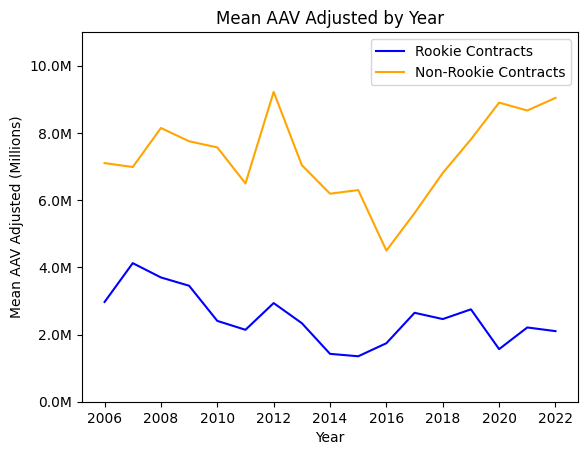

In [148]:
df_rook = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'Y']
df_not_rook = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'N']

result_rook = df_rook.groupby('Year')['AAV Adjusted'].mean()
result_not_rook = df_not_rook.groupby('Year')['AAV Adjusted'].mean()

plt.plot(result_rook.index, result_rook.values, label='Rookie Contracts', color='blue')
plt.plot(result_not_rook.index, result_not_rook.values, label='Non-Rookie Contracts', color='orange')

plt.xlabel('Year')
plt.ylabel('Mean AAV Adjusted (Millions)')
plt.title('Mean AAV Adjusted by Year')

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.ylim(0, 11_000_000)  # Adjust the limits as needed

plt.legend()

plt.show()

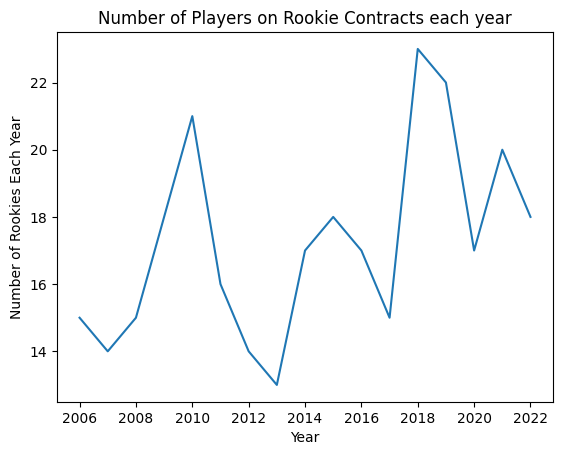

In [149]:
rookie_contract_df = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'Y']

# Group by 'Year' and count the occurrences of 'Y'
result = rookie_contract_df.groupby('Year')['Rookie Contract (Y/N)'].count()

plt.plot(result.index, result.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Rookies Each Year')
plt.title('Number of Players on Rookie Contracts each year')

# Show the plot
plt.show()

In [157]:
dfx10 = pd.concat([df06, df07, df08, df09, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
dfdropx10 = dfx10[dfx10['AAV Adjusted'] != '#VALUE!']

dfdropx10['Payroll Adjusted'] = dfdropx10['Payroll Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)
result = dfdropx10.groupby('Year')['Payroll Adjusted'].mean()
result

/var/folders/zg/329ty9ws0hlfcxk3nkfm6s9r0000gn/T/ipykernel_41293/4054572736.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfdropx10['Payroll Adjusted'] = dfdropx10['Payroll Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)
/var/folders/zg/329ty9ws0hlfcxk3nkfm6s9r0000gn/T/ipykernel_41293/4054572736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdropx10['Payroll Adjusted'] = dfdropx10['Payroll Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)


Year
2006.0    1.553460e+08
2007.0    1.614290e+08
2008.0    1.654160e+08
2009.0    1.760130e+08
2011.0    1.555889e+08
2012.0    1.717324e+08
2013.0    1.620684e+08
2014.0    1.712241e+08
2015.0    1.826687e+08
2016.0    1.936811e+08
2017.0    2.033375e+08
2018.0    2.169565e+08
2019.0    2.253800e+08
2020.0    2.375068e+08
2021.0    2.134906e+08
2022.0    2.180443e+08
Name: Payroll Adjusted, dtype: float64

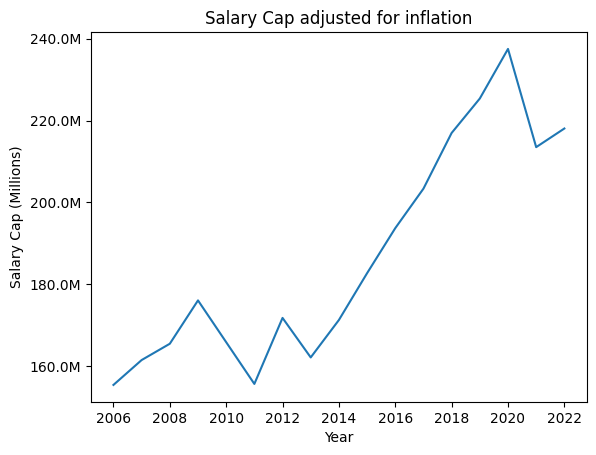

In [161]:
plt.plot(result.index, result.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Salary Cap (Millions)')
plt.title('Salary Cap adjusted for inflation')
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()